In this notebook, we'll implement a minimal example of a 1D Gaussian process and apply this approach to regression.

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# The kernel, which describes the correlation between y(x1) and y(x2) as a function of |x1-x2|:
def k(x1, x2, sig=0.1):
    return np.exp(-(x1-x2)**2/(2*sig)**2)

**Exercise**: For $N=100$ evenly spaced x values over $(0,1)$, let $\vec{y}$ be a vector of the corresponding $y$ values such that $p(\vec{y}) = \mathcal{N}(\vec{y} | 0, \mathbf{K})$. Use the kernel function defined above to create the covariance matrix $\mathbf{K}$. Use `np.random.multivariate_normal()` to draw and plot a few samples from this distribution.

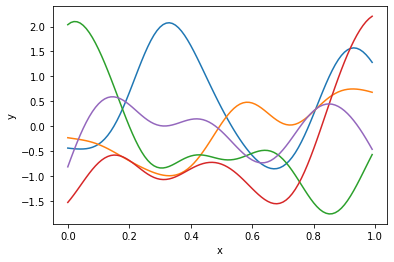

In [3]:
## Solution ##

# Create the covariance matrix:
n = 100  # number of points
K = np.zeros((n,n))  # covariance matrix, where K[i,j] = Cov(y(x_i), y(x_j))
for ii in range(n):
    for jj in range(n):
        K[ii,jj] = k(ii/n, jj/n, sig=0.1)  # sig determines how wiggly the lines will be

# Draw some samples (i.e. functions y(x)) from the distribution over y:
n_samples = 5  # number of curves to plot
y = np.zeros((n_samples, n))
for ii in range(n_samples):
    y[ii,:] = np.random.multivariate_normal(np.zeros(n), K)

# Plot the results:
plt.plot(np.arange(n)/n, y.T);
plt.xlabel('x');
plt.ylabel('y');

# Gaussian process regression


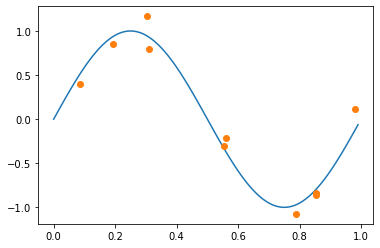

In [4]:
# Make some fake data:
noise = 0.05  # aka beta inverse
n = 10
x = np.random.rand(n)
y = np.sin(2*np.pi*x) + noise**0.5*np.random.randn(n)

n_array = 100
x_array = np.arange(0, 1, 1/n_array)
y_true = np.sin(2*np.pi*x_array)

# Plot the data together with the function that was used to generate it:
plt.plot(x_array, y_true)
plt.plot(x, y, 'o')

**Exercise**: Using the `n` data points defined above, create the covariance matrix $\mathbf{C}_N$. Use this to compute $m(\vec{x}_{N+1})$ and $\sigma^2(\vec{x}_{N+1})$ for the distribution of expected $t$ values corresponding to a new data point, i.e. $p(t_{N+1} | \vec{t}) = \mathcal{N}(t_{N+1} | m(\vec{x}_{N+1}), \sigma^2(\vec{x}_{N+1}))$. Compute these quantities for each data point in `x_array` defined above, and save the results in 1D arrays `m` and `s2`.

In [5]:
## Solution ##

# Create the covariance matrix and take its inverse:
cN = np.zeros((n,n))
for ii, x1 in enumerate(x):
    for jj, x2 in enumerate(x):
        cN[ii,jj] = k(x1, x2) + (ii==jj)*noise
cN_inv = np.linalg.inv(cN)

# The means and variances of predicted t values for each x in x_array:
m, s2 = np.zeros(n_array), np.zeros(n_array)
for ii, xx in enumerate(x_array):
    m[ii] = k(xx, x) @ cN_inv @ y
    s2[ii] = k(xx, xx) + 1*noise - k(xx, x) @ cN_inv @ k(xx, x)

**Exercise**: Using the quantities just computed, plot the curve that gives the model predictions. The uncertainty of the prediction can be shown as a shaded region using `plt.fill_between()`.

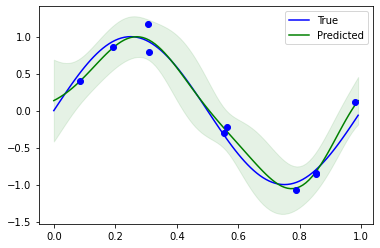

In [6]:
## Solution ##

# Plot the data together with the GP fit:
plt.plot(x_array, y_true, 'b')
plt.plot(x_array, m, 'g')
plt.fill_between(x_array, m - s2**0.5, m + s2**0.5, color='g', alpha=0.1)
plt.plot(x, y, 'ob')
plt.legend(['True', 'Predicted'])